In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import exp1 as W

In [2]:
def set_time(t):
    if isinstance(t, (int, float, np.int, np.float)):
        t = np.array([t], dtype=np.float)
    elif isinstance(t, (list, tuple)):
        t = np.array(t, dtype=np.float)
    elif isinstance(t, (str)):
        print("dummy you can't use a string '{}'".format(t))
        return None
    return t

In [3]:
def Theis(r, t, Q=1.16, T=0.30, S=0.0008):
    t = set_time(t)
    u = np.zeros(t.shape[0], dtype=np.float)
    mask = t > 0.
    u[mask] = r**2 * S / (4 * T * t[mask])
    s = Q / (4 * np.pi * T) * W(u)
    return s

In [4]:
def Radius(ptw=(0., 0.), pto=(1000., 1000.)):
    return np.sqrt((ptw[0] - pto[0])**2 + 
                   (ptw[1] - pto[1])**2)

s = Theis(Radius(), 'time')

In [5]:
s = Theis(Radius(), 86400., Q=11.6)
s

array([11.10630074])

In [6]:
t = np.arange(0, 864000., 864.)

In [7]:
s = Theis(Radius(), t)

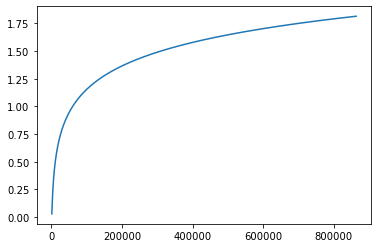

In [8]:
plt.plot(t, s)

In [9]:
s = Theis(Radius(), [0., 100., 200.])

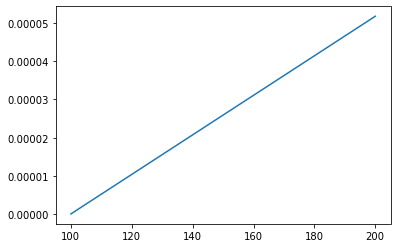

In [10]:
plt.plot([0., 100., 200.], s)

In [11]:
def TheisArray(nrows, t, dx=100., ptw=(0,0), 
               Q=1.16, T=0.30, S=0.0008):
    t = set_time(t)
    ncols = nrows
    s = np.zeros((t.shape[0], nrows, ncols), 
                 dtype=np.float)
    for i in range(nrows):
        for j in range(ncols):
            x = (j + 0.5) * dx
            y = (nrows - i - 0.5) * dx
            r = Radius(ptw, (x, y))
            s[:, i, j] = Theis(r, t, Q=Q, T=T, S=S)
    return s

In [12]:
sarray = TheisArray(10, [864000., 8640000., 8.640000e10])
sarray.shape

(3, 10, 10)

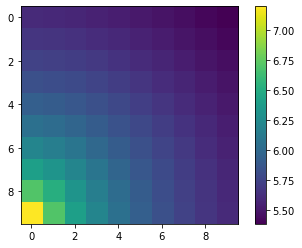

In [13]:
plt.imshow(sarray[-1, :, :])
plt.colorbar()